In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import joblib
from matplotlib import colors


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



from scipy import stats
import seaborn as sns
import geopandas as gpd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

import datetime
# import cudf
from os.path import exists
import cv2
import gc


%matplotlib inline

In [ ]:
# import shutil

# # Specify the path to the folder you want to delete
# folder_path = '/content/node_modules'

# # Delete the folder and its contents
# shutil.rmtree(folder_path)

# print('Folder deleted successfully.')

Folder deleted successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
jobs_df = pd.read_csv('/content/drive/MyDrive/job_recsys/jobs.tsv', sep='\t', error_bad_lines=False, nrows=99999)
jobs_df.head()

<ipython-input-2-d56b327517f1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  jobs_df = pd.read_csv('/content/drive/MyDrive/job_recsys/jobs.tsv', sep='\t', error_bad_lines=False, nrows=99999)
<ipython-input-2-d56b327517f1>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  jobs_df = pd.read_csv('/content/drive/MyDrive/job_recsys/jobs.tsv', sep='\t', error_bad_lines=False, nrows=99999)


,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59


In [ ]:
apps = pd.read_csv('/content/drive/MyDrive/job_recsys/apps.tsv', delimiter='\t')
# pop_jobs = pd.read_csv('/content/drive/MyDrive/job_recsys/popular_jobs.csv')
# # pop_jobs = pd.read_csv('data.csv', delimiter=';')

# users = pd.read_csv('/content/drive/MyDrive/job_recsys/users.tsv', delimiter='\t')
# user_history = pd.read_csv('/content/drive/MyDrive/job_recsys/user_history.tsv', delimiter='\t')
# window_dates = pd.read_csv('/content/drive/MyDrive/job_recsys/window_dates.tsv', delimiter='\t')

In [ ]:
window_dates.head()

,Window,Train Start,Train End / Test Start,Test End
0,1,2012-04-01 00:00:00,2012-04-10 00:00:00,2012-04-14 00:00:00
1,2,2012-04-14 00:00:00,2012-04-23 00:00:00,2012-04-27 00:00:00
2,3,2012-04-27 00:00:00,2012-05-06 00:00:00,2012-05-10 00:00:00
3,4,2012-05-10 00:00:00,2012-05-19 00:00:00,2012-05-23 00:00:00
4,5,2012-05-23 00:00:00,2012-06-01 00:00:00,2012-06-05 00:00:00


In [ ]:
users.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [ ]:
user_history.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [ ]:
apps.head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [ ]:
pop_jobs.head()

,UserId,JobIds
0,767,299322 602736 1077691 625281 898514 1035141 65...
1,769,340536 28811 305416 970973 765210 114951 90808...
2,861,384120 1096879 23663 1003185 787775 47052 9343...
3,1006,219766 379509 840434 691160 813087 751038 2980...
4,1192,208362 919831 508443 630792 1075583 797189 327...


# Data Cleaning

Looking into the dataset, there is a huge need in data cleaning and preprocessing process for text data, specifically focusing on the 'Description' and 'Requirements' columns of the jobs dataset.

The aim of this step is to preprocess text data by removing HTML tags and entities, adding spaces after specific characters, and eliminating extra spaces. The cleaned text is then stored in new columns named 'DescCleaned' and 'ReqCleaned' in the DataFrame jobs_df. This preprocessing step is typically performed to ensure that the text data is in a suitable format for further analysis, such as text mining or natural language processing.







In [ ]:
jobs_df.at[0, 'Requirements']

'<p>SKILL SET</p>\\r<p>&nbsp;</p>\\r<p>Network Security tools:</p>\\r<p>&nbsp;</p>\\r<p>Webdefend Web Application Firewall (WAF), Cisco Routers, Fortigate 3800 Firewall series, Palo Alto 4000 firewall series, Cisco ASA 5xx Firewall Platform, Cisco&nbsp; FWSM,&nbsp; SourceFire Defense Center, SourceFire IP Sensor Platform, BlueCoat SG Appliance, F5 BigIP(reverse proxy).</p>\\r<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; </p>\\r<p>Web Application tools:&nbsp; </p>\\r<p>&nbsp;</p>\\r<p>AppDective, Fortify SCA, HP WebInspect, and the like.</p>\\r<p>&nbsp;</p>\\r<p>Network Vulnerability tools:&nbsp; </p>\\r<p>&nbsp;</p>\\r<p>Tenable Security Center, McAfee Foundstone scanner, Cain and Able, L0phtcrack - Password Cracker, Nessus Vulnerability Scanner, NMAP &ndash; Port Scanner, and other scanning and vulnerability mapping tools.&nbsp; </p>\\r<p>&nbsp;</p>\\r<p>&nbsp;</p>\\r<p>DESIRABLE SKILLS:</p>\\r<p>&nbsp;</p>\\r<p>CISSP and/or related Certifications</p>\\r<p>&nbs

In [ ]:
removePattern = r'(<(.*?)>)|(&\w+)' #remove HTML tags
addSpacePattern = r'([;:])|(\\r)|(\\n)' #add spaces
removeExtraSpaces = r'(\s\s+?)(?=\S)'  #remove extra spaces
jobs_df['DescCleaned'] = jobs_df['Description'].str.lower() #creates a new column named 'DescCleaned'and converts the text in the 'Description' column to lowercase.
jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(removePattern, "") #remove HTML tags and entities using the removePattern regular expression.
jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(addSpacePattern, " ") #add spaces after certain characters using the addSpacePattern regular expression.
jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(removeExtraSpaces, " ") #removes extra spaces using the removeExtraSpaces regular expression.

# Same for Requirements
jobs_df['ReqCleaned'] = jobs_df['Requirements'].str.lower()
jobs_df['ReqCleaned'] = jobs_df['ReqCleaned'].str.replace(removePattern, "")
jobs_df['ReqCleaned'] = jobs_df['ReqCleaned'].str.replace(addSpacePattern, " ")
jobs_df['ReqCleaned'] = jobs_df['ReqCleaned'].str.replace(removeExtraSpaces, " ")


<ipython-input-5-f13d6754f163>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(removePattern, "") #remove HTML tags and entities using the removePattern regular expression.
<ipython-input-5-f13d6754f163>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(addSpacePattern, " ") #add spaces after certain characters using the addSpacePattern regular expression.
<ipython-input-5-f13d6754f163>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_df['DescCleaned'] = jobs_df['DescCleaned'].str.replace(removeExtraSpaces, " ") #removes extra spaces using the removeExtraSpaces regular expression.
<ipython-input-5-f13d6754f163>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_d

In [ ]:
jobs_df.at[0, 'ReqCleaned']

'skill set network security tools webdefend web application firewall (waf), cisco routers, fortigate 3800 firewall series, palo alto 4000 firewall series, cisco asa 5xx firewall platform, cisco fwsm, sourcefire defense center, sourcefire ip sensor platform, bluecoat sg appliance, f5 bigip(reverse proxy). web application tools appdective, fortify sca, hp webinspect, and the like. network vulnerability tools tenable security center, mcafee foundstone scanner, cain and able, l0phtcrack - password cracker, nessus vulnerability scanner, nmap port scanner, and other scanning and vulnerability mapping tools. desirable skills cissp and/or related certifications education and years of experience bs computer science or related discipline minimum of 8 years in it security minimum 4 years in senior/lead position apply here'

# User EDA

I want to specify the the project will be only on USA job search area

In [ ]:
#Filter rows where 'Country' is 'US'
USA_users = users[users['Country'] == 'US']

In [ ]:
USA_users.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [ ]:
USA_users.shape

(388499, 15)

In [ ]:
USA_users.columns

Index(['UserID', 'WindowID', 'Split', 'City', 'State', 'Country', 'ZipCode',
       'DegreeType', 'Major', 'GraduationDate', 'WorkHistoryCount',
       'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers',
       'ManagedHowMany'],
      dtype='object')

In [ ]:
USA_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388499 entries, 0 to 389707
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UserID                388499 non-null  int64  
 1   WindowID              388499 non-null  int64  
 2   Split                 388499 non-null  object 
 3   City                  388499 non-null  object 
 4   State                 388499 non-null  object 
 5   Country               388499 non-null  object 
 6   ZipCode               387964 non-null  object 
 7   DegreeType            388499 non-null  object 
 8   Major                 291545 non-null  object 
 9   GraduationDate        268530 non-null  object 
 10  WorkHistoryCount      388499 non-null  int64  
 11  TotalYearsExperience  374398 non-null  float64
 12  CurrentlyEmployed     346494 non-null  object 
 13  ManagedOthers         388499 non-null  object 
 14  ManagedHowMany        388499 non-null  int64  
dtype

In [ ]:
USA_users.isnull().sum()

UserID                       0
WindowID                     0
Split                        0
City                         0
State                        0
Country                      0
ZipCode                    535
DegreeType                   0
Major                    96954
GraduationDate          119969
WorkHistoryCount             0
TotalYearsExperience     14101
CurrentlyEmployed        42005
ManagedOthers                0
ManagedHowMany               0
dtype: int64

<ipython-input-13-1efba513adf4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = USA_users.corr()


<Axes: >

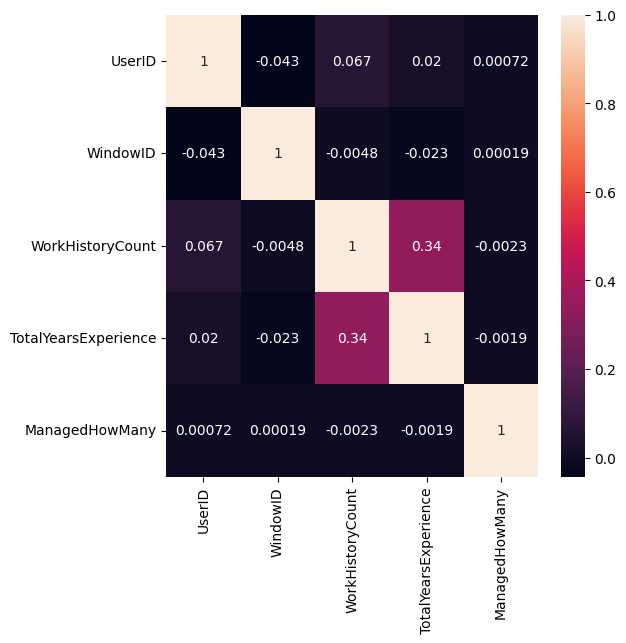

In [ ]:
corr = USA_users.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, )

**Handling Missing Values**

Now, I'll replace the missing zipcode values by mapping them to the corresponding state value.

In [ ]:
# Create a dictionary mapping State values to Zipcode values
state_to_zipcode = USA_users.dropna(subset=['State', 'ZipCode'])[['State', 'ZipCode']].set_index('State')['ZipCode'].to_dict()
state_to_zipcode

# Replace NaN values in 'Zipcode' column using the mapping
USA_users['ZipCode'] = USA_users.apply(lambda row: state_to_zipcode.get(row['State'], row['ZipCode']), axis=1)

# Print the updated DataFrame
USA_users

<ipython-input-14-47e765406eb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_users['ZipCode'] = USA_users.apply(lambda row: state_to_zipcode.get(row['State'], row['ZipCode']), axis=1)


,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,95823,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,95823,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,07307,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11378,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70124,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389703,1471997,7,Train,Baltimore,MD,US,21222,High School,Math,2004-06-01 00:00:00,3,5.0,No,Yes,45
389704,1472042,7,Train,Saint Clair Shores,MI,US,48081,High School,NaN,1970-01-01 00:00:00,7,32.0,Yes,No,0
389705,1472058,7,Train,Maspeth,NY,US,11378,Associate's,NaN,2001-01-01 00:00:00,2,8.0,Yes,Yes,3
389706,1472060,7,Train,Lawrenceville,GA,US,30045,High School,"Business, early childhood education",2010-08-01 00:00:00,3,1.0,No,No,0


In [ ]:
USA_users

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,95823,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,95823,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,07307,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11378,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70124,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389703,1471997,7,Train,Baltimore,MD,US,21222,High School,Math,2004-06-01 00:00:00,3,5.0,No,Yes,45
389704,1472042,7,Train,Saint Clair Shores,MI,US,48081,High School,NaN,1970-01-01 00:00:00,7,32.0,Yes,No,0
389705,1472058,7,Train,Maspeth,NY,US,11378,Associate's,NaN,2001-01-01 00:00:00,2,8.0,Yes,Yes,3
389706,1472060,7,Train,Lawrenceville,GA,US,30045,High School,"Business, early childhood education",2010-08-01 00:00:00,3,1.0,No,No,0


In [ ]:
USA_users.isnull().sum()

UserID                       0
WindowID                     0
Split                        0
City                         0
State                        0
Country                      0
ZipCode                      0
DegreeType                   0
Major                    96954
GraduationDate          119969
WorkHistoryCount             0
TotalYearsExperience     14101
CurrentlyEmployed        42005
ManagedOthers                0
ManagedHowMany               0
dtype: int64

Due to its marginal relevance in this specific context of recommending jobs, the determination has been reached to exclude the "Graduation Date" attribute from the dataset. Similarly, with regards to the "CurrentlyEmployed" column, which appears to bear minimal influence on the type of job recommendations for users, I am inclined to remove it from the dataset as well.

In [ ]:
# Delete a column using the drop() method
users_df = USA_users.drop(columns=['GraduationDate','CurrentlyEmployed'], axis=1)

In [ ]:
# users_df = USA_users.drop("CurrentlyEmployed", axis=1)

In [ ]:
users_df.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,95823,High School,NaN,3,10.0,No,0
1,72,1,Train,La Mesa,CA,US,95823,Master's,Anthropology,10,8.0,No,0
2,80,1,Train,Williamstown,NJ,US,07307,High School,Not Applicable,5,11.0,Yes,5
3,98,1,Train,Astoria,NY,US,11378,Master's,Journalism,3,3.0,No,0
4,123,1,Train,Baton Rouge,LA,US,70124,Bachelor's,Agricultural Business,1,9.0,No,0


In [ ]:
users.shape

(389708, 15)

In [ ]:
users_df.isnull().sum()

UserID                      0
WindowID                    0
Split                       0
City                        0
State                       0
Country                     0
ZipCode                     0
DegreeType                  0
Major                   96954
WorkHistoryCount            0
TotalYearsExperience    14101
ManagedOthers               0
ManagedHowMany              0
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (users_df.isnull().sum() / len(users_df)) * 100
missing_percentage

UserID                   0.000000
WindowID                 0.000000
Split                    0.000000
City                     0.000000
State                    0.000000
Country                  0.000000
ZipCode                  0.000000
DegreeType               0.000000
Major                   24.956049
WorkHistoryCount         0.000000
TotalYearsExperience     3.629610
ManagedOthers            0.000000
ManagedHowMany           0.000000
dtype: float64

Considering the modest proportion of missing values observed in the "TotalYearsExperience" column, a prudent course of action could involve imputing these missing values with the calculated average.

In [ ]:
users_df['TotalYearsExperience'] = users_df['TotalYearsExperience'].fillna(users_df['TotalYearsExperience'].mean())

In [ ]:
missing_percentage = (users_df.isnull().sum() / len(users_df)) * 100
missing_percentage

UserID                   0.000000
WindowID                 0.000000
Split                    0.000000
City                     0.000000
State                    0.000000
Country                  0.000000
ZipCode                  0.000000
DegreeType               0.000000
Major                   24.956049
WorkHistoryCount         0.000000
TotalYearsExperience     0.000000
ManagedOthers            0.000000
ManagedHowMany           0.000000
dtype: float64

In [ ]:
users_df.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,95823,High School,NaN,3,10.0,No,0
1,72,1,Train,La Mesa,CA,US,95823,Master's,Anthropology,10,8.0,No,0
2,80,1,Train,Williamstown,NJ,US,07307,High School,Not Applicable,5,11.0,Yes,5
3,98,1,Train,Astoria,NY,US,11378,Master's,Journalism,3,3.0,No,0
4,123,1,Train,Baton Rouge,LA,US,70124,Bachelor's,Agricultural Business,1,9.0,No,0


In [ ]:
users_df.dropna(subset=['Major'], inplace=True)
users_df.isnull().sum()

UserID                  0
WindowID                0
Split                   0
City                    0
State                   0
Country                 0
ZipCode                 0
DegreeType              0
Major                   0
WorkHistoryCount        0
TotalYearsExperience    0
ManagedOthers           0
ManagedHowMany          0
dtype: int64

In [ ]:
users_df['Major'].value_counts()

Not Applicable                                              58725
Business Administration                                     12391
Accounting                                                   7566
Business Management                                          5964
General Studies                                              5201
                                                            ...  
Business Administration- Management/ Marketing                  1
Organizational Development and Strategic Human Resources        1
BSCJ                                                            1
East Asian Languages and Cultures                               1
Business, early childhood education                             1
Name: Major, Length: 46840, dtype: int64

In [ ]:
users_df.isnull().sum()

UserID                  0
WindowID                0
Split                   0
City                    0
State                   0
Country                 0
ZipCode                 0
DegreeType              0
Major                   0
WorkHistoryCount        0
TotalYearsExperience    0
ManagedOthers           0
ManagedHowMany          0
dtype: int64

In [ ]:
users_df.to_csv('users_final_df')

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(5 * figscale, 5 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(USA_users, *['CurrentlyEmployed', 'ManagedOthers'], **{})
chart

In [ ]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(5 * figscale, 5 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(USA_users, *['DegreeType', 'CurrentlyEmployed'], **{})
chart

In [ ]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(USA_users, *['DegreeType'], **{})
chart

In [ ]:
USA_users.isnull().sum()

UserID                       0
WindowID                     0
Split                        0
City                         0
State                        0
Country                      0
ZipCode                      0
DegreeType                   0
Major                    96954
GraduationDate          119969
WorkHistoryCount             0
TotalYearsExperience     14101
CurrentlyEmployed        42005
ManagedOthers                0
ManagedHowMany               0
dtype: int64

In [ ]:
#Check columns that don't have nan values
USA_users.columns[users.notna().all()]

Index(['UserID', 'WindowID', 'Split', 'City', 'Country', 'DegreeType',
       'WorkHistoryCount', 'ManagedOthers', 'ManagedHowMany'],
      dtype='object')

In [ ]:
user_city_wise = USA_users.groupby(['City']).size().reset_index(
    name='User_count').sort_values('User_count',ascending=False)

In [ ]:
user_US_City_th = user_city_wise.loc[user_city_wise['User_count']>=12]

In [ ]:
user_US_City_th.head()

,City,User_count
1544,Chicago,7674
4098,Houston,6012
4211,Indianapolis,4870
5645,Miami,4750
7016,Philadelphia,4710


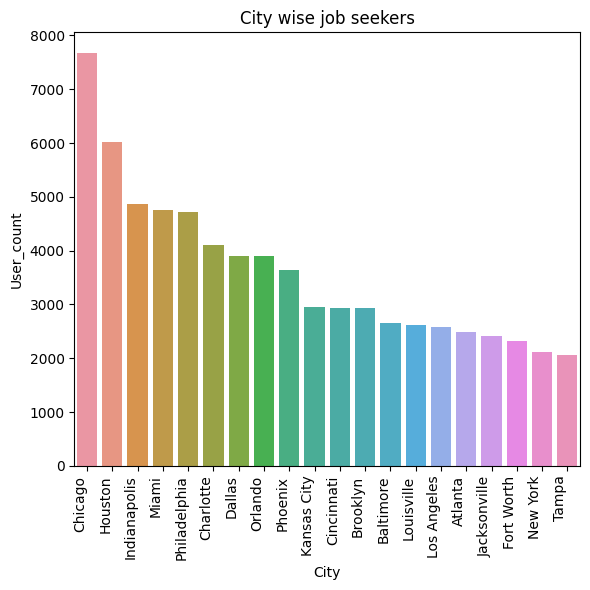

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x="City", y="User_count",data=user_US_City_th.head(20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job seekers')
plt.tight_layout()
plt.show()

In [ ]:
def plot_top_10(field, df):
  field_counts = df[field].value_counts().head(10)
  # Plotting the top 10 most popular majors
  plt.figure(figsize=(10, 6))
  field_counts.plot(kind='bar', color='blue')
  plt.title(f'Top 10 Most Popular {field}')
  plt.xlabel(field)
  plt.ylabel('Number of Users')
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Show the plot
  plt.show()


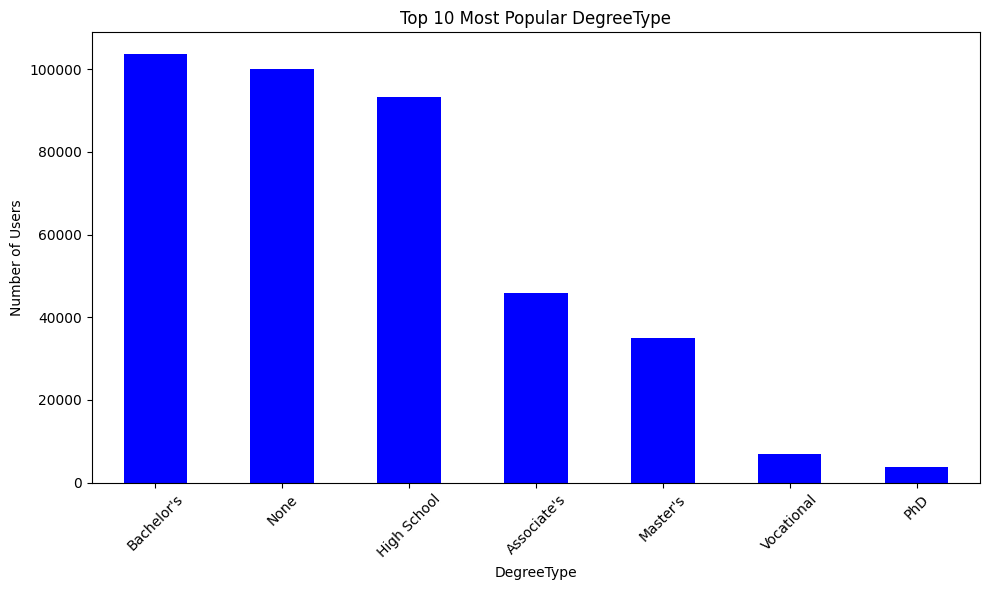

In [ ]:
#Plot the to 10 most popular degrees
plot_top_10('DegreeType',USA_users)

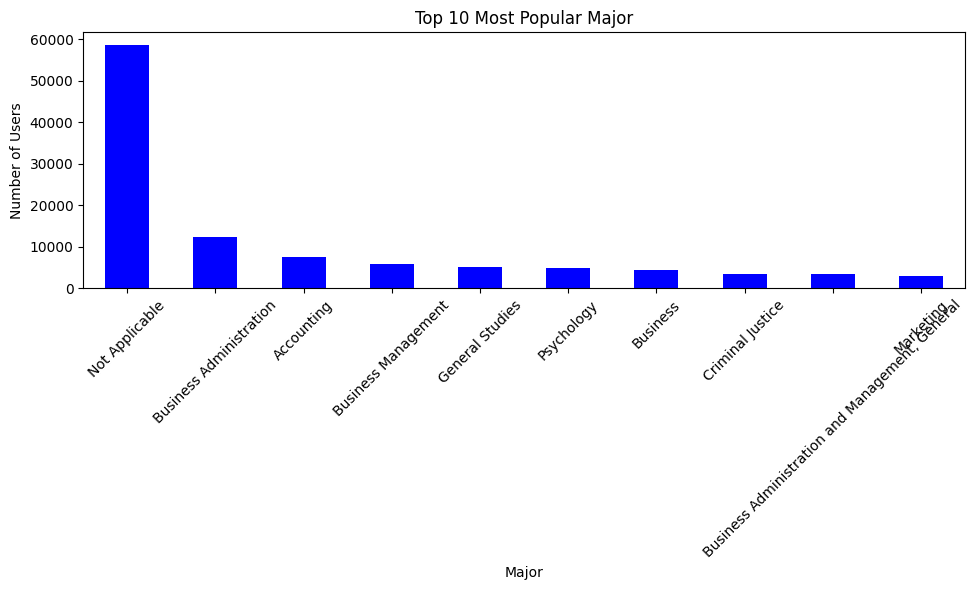

In [ ]:
#Plot the to 10 most popular Majors
plot_top_10('Major',USA_users)

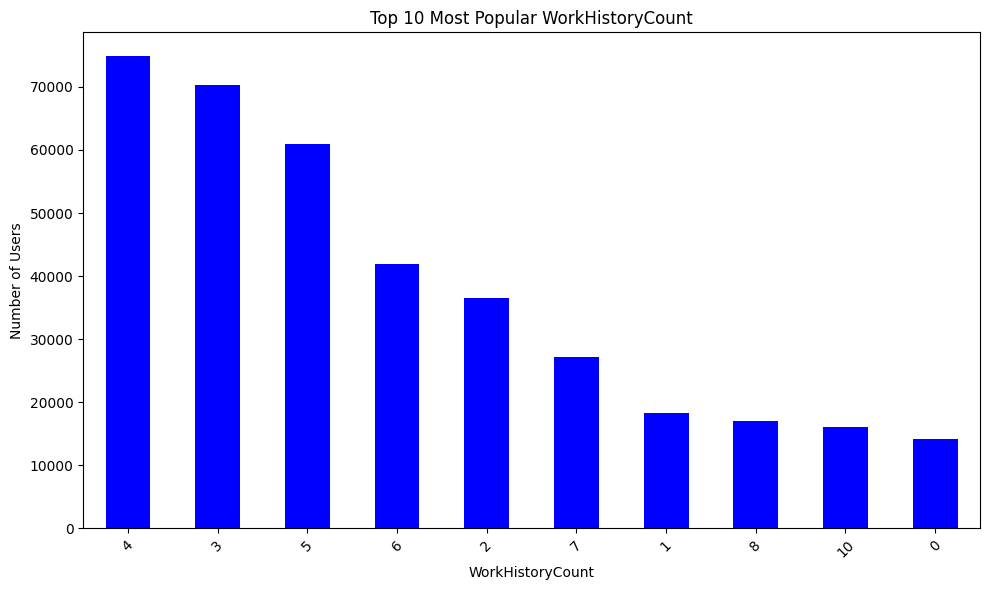

In [ ]:
# Work History Count
plot_top_10('WorkHistoryCount',USA_users)

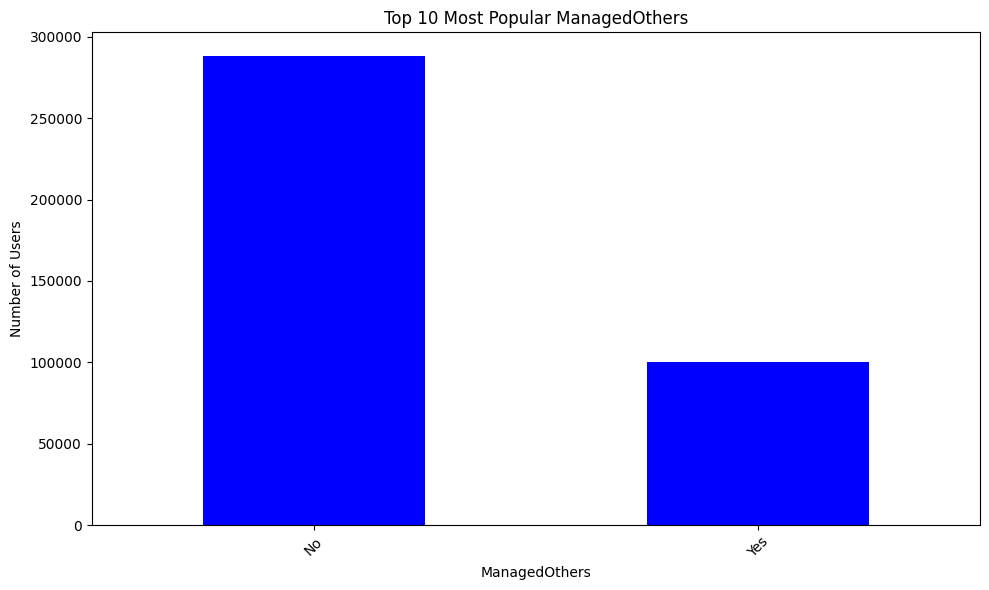

In [ ]:
# Managerial experience
plot_top_10('ManagedOthers',USA_users)

In [ ]:
users_df.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
1,72,1,Train,La Mesa,CA,US,95823,Master's,Anthropology,10,8.0,No,0
2,80,1,Train,Williamstown,NJ,US,07307,High School,Not Applicable,5,11.0,Yes,5
3,98,1,Train,Astoria,NY,US,11378,Master's,Journalism,3,3.0,No,0
4,123,1,Train,Baton Rouge,LA,US,70124,Bachelor's,Agricultural Business,1,9.0,No,0
5,131,1,Train,Houston,TX,US,79412,Bachelor's,Finance,3,14.0,No,0


In [ ]:
# Sort the DataFrame by 'UserID' column in ascending order
sorted_user_df = users_df.sort_values(by='UserID')

In [ ]:
sorted_user_df.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
135288,7,3,Train,Roanoke,VA,US,24018,High School,Not Applicable,2,13.0,No,0
191184,9,4,Train,Houston,TX,US,79412,High School,Not Applicable,3,3.0,No,0
296639,13,6,Test,Philadelphia,PA,US,18078,Bachelor's,Psychological & Social Sciences,6,5.0,No,0
191185,14,4,Train,San Antonio,TX,US,79412,None,General,2,10.0,No,0
244633,16,5,Train,Atlanta,GA,US,30045,Bachelor's,Security,9,9.0,No,0


In [ ]:
((sorted_user_df.isnull().sum())/ len(sorted_user_df))*100

UserID                  0.0
WindowID                0.0
Split                   0.0
City                    0.0
State                   0.0
Country                 0.0
ZipCode                 0.0
DegreeType              0.0
Major                   0.0
WorkHistoryCount        0.0
TotalYearsExperience    0.0
ManagedOthers           0.0
ManagedHowMany          0.0
dtype: float64

## Feature selection and Engineering

In [ ]:
sorted_user_df.shape

(291545, 13)

In [ ]:
duplicates = sorted_user_df[sorted_user_df.duplicated()] #get all duplicates
df_cleaned = sorted_user_df.drop_duplicates() #remove duplicates from the dataset


In [ ]:
sorted_user_df.shape

(291545, 13)

It seems like we have no duplicate rows in this dataset

In [ ]:
sorted_user_df.columns

Index(['UserID', 'WindowID', 'Split', 'City', 'State', 'Country', 'ZipCode',
       'DegreeType', 'Major', 'WorkHistoryCount', 'TotalYearsExperience',
       'ManagedOthers', 'ManagedHowMany'],
      dtype='object')

**Feature selection**:I have identified the most relevant features for the user dataset, which include 'UserID', 'ZipCode', 'DegreeType', 'Major', 'WorkHistoryCount', 'TotalYearsExperience', 'ManagedOthers', and 'ManagedHowMany'. I made the deliberate choice to exclude the features 'City', 'State', and 'Country', as they all inherently indicate the user's location. By retaining only the 'ZipCode' feature, we avoid introducing excessive location-based bias. This approach ensures that multiple location-related columns do not skew the dataset's representation of this information in various forms.

In [ ]:
useful_user_df= sorted_user_df[['UserID','ZipCode', 'DegreeType', 'Major', 'WorkHistoryCount', 'TotalYearsExperience','ManagedOthers', 'ManagedHowMany']]
useful_user_df.head()

,UserID,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
135288,7,24018,High School,Not Applicable,2,13.0,No,0
191184,9,79412,High School,Not Applicable,3,3.0,No,0
296639,13,18078,Bachelor's,Psychological & Social Sciences,6,5.0,No,0
191185,14,79412,None,General,2,10.0,No,0
244633,16,30045,Bachelor's,Security,9,9.0,No,0


In [ ]:
useful_user_df.to_csv('users_final_df')

Now, I will encode the categorical data that I have. In this case, 'DegreeType',  'Major' and 'ManagedOthers'.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Apply label encoding to categorical columns
# useful_user_df['DegreeType_encoded'] = label_encoder.fit_transform(useful_user_df['DegreeType'])
# useful_user_df['Major_encoded'] = label_encoder.fit_transform(useful_user_df['Major'])
# useful_user_df['ManagedOthers_encoded'] = label_encoder.fit_transform(useful_user_df['ManagedOthers'])

In [ ]:
# user_df_final=useful_user_df[['UserID','ZipCode', 'DegreeType_encoded', 'Major_encoded', 'WorkHistoryCount', 'TotalYearsExperience','ManagedOthers_encoded', 'ManagedHowMany']]
# user_df_final.head()

In [ ]:
# user_df_final.info()

In [ ]:
# user_df_final['Zipcodes_encoded'] = label_encoder.fit_transform(useful_user_df['ZipCode'])


In [ ]:
# user_df_final=user_df_final[['UserID','Zipcodes_encoded', 'DegreeType_encoded', 'Major_encoded', 'WorkHistoryCount', 'TotalYearsExperience','ManagedOthers_encoded', 'ManagedHowMany']]
# user_df_final.head()

***Standardisation***

In [ ]:
# # apply Standardisation technique
# def standardise(dataset):
#   for column in dataset.columns:
#       dataset[column] = (dataset[column] -
#                             dataset[column].mean()) / dataset[column].std()
#   return dataset

In [ ]:
# standardized_user_data=standardise(user_df_final)
# standardized_user_data.head()

# Jobs EDA

In [ ]:
USA_jobs = jobs_df[jobs_df['Country'] == 'US']

In [ ]:
USA_jobs.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate,DescCleaned,ReqCleaned
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59,i make sure every part of their day is magical...,please refer to the job description to view th...


In [ ]:
USA_jobs.shape

(99913, 13)

In [ ]:
USA_jobs.columns

Index(['JobID', 'WindowID', 'Title', 'Description', 'Requirements', 'City',
       'State', 'Country', 'Zip5', 'StartDate', 'EndDate', 'DescCleaned',
       'ReqCleaned'],
      dtype='object')

In [ ]:
jobs_df= USA_jobs.drop(columns=['Description', 'Requirements'],axis=1)

In [ ]:
jobs_df.head()

,JobID,WindowID,Title,City,State,Country,Zip5,StartDate,EndDate,DescCleaned,ReqCleaned
0,1,1,Security Engineer/Technical Lead,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,1,SAP Business Analyst / WM,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,1,P/T HUMAN RESOURCES ASSISTANT,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,1,Route Delivery Drivers,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,1,Housekeeping,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59,i make sure every part of their day is magical...,please refer to the job description to view th...


In [ ]:
jobs_df.isnull().sum()

JobID              0
WindowID           0
Title              0
City               0
State              0
Country            0
Zip5           37257
StartDate          0
EndDate            0
DescCleaned        0
ReqCleaned      7911
dtype: int64

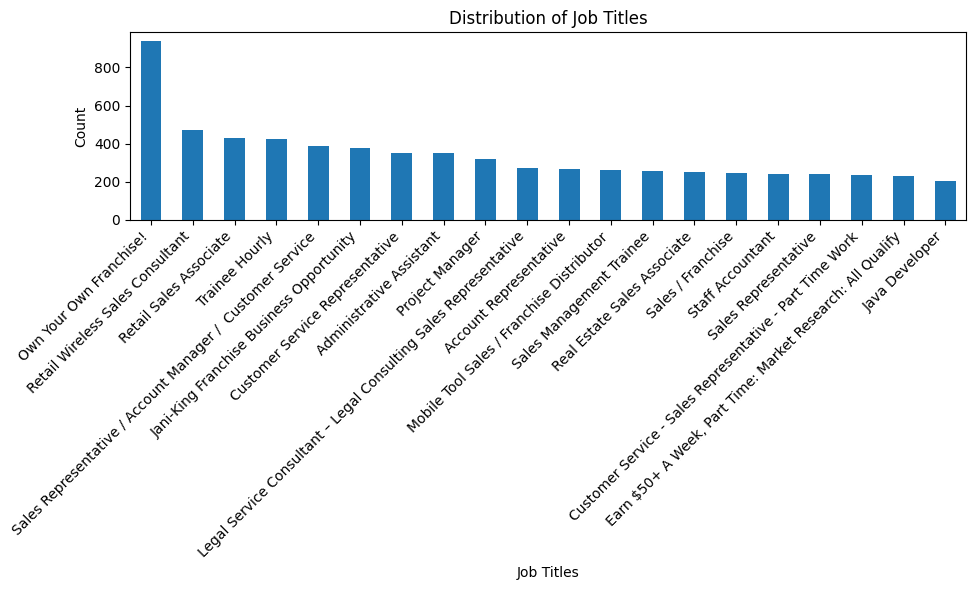

In [ ]:
# Plot the distribution of job titles
plt.figure(figsize=(10, 6))
jobs_df['Title'].value_counts()[:20].plot(kind='bar')
plt.title('Distribution of Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph depicted above illustrates the distribution of job titles within our dataset. It is evident that the most prominent job title is "Entrepreneurship," specifically labeled as 'Own Your Own Franchise!', followed by the position of 'Retail Wireless Sales Consultant.’

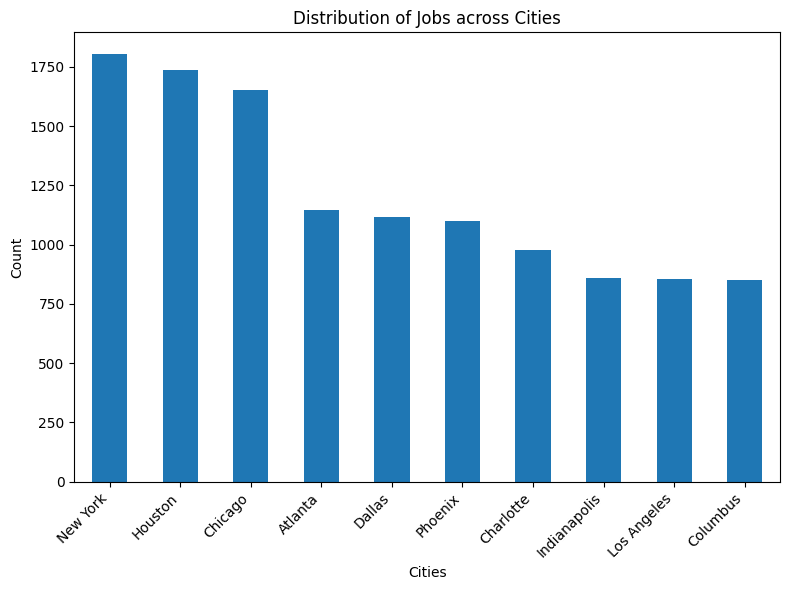

In [ ]:
# Plot a bar chart for city distribution
plt.figure(figsize=(8, 6))
jobs_df['City'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Jobs across Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

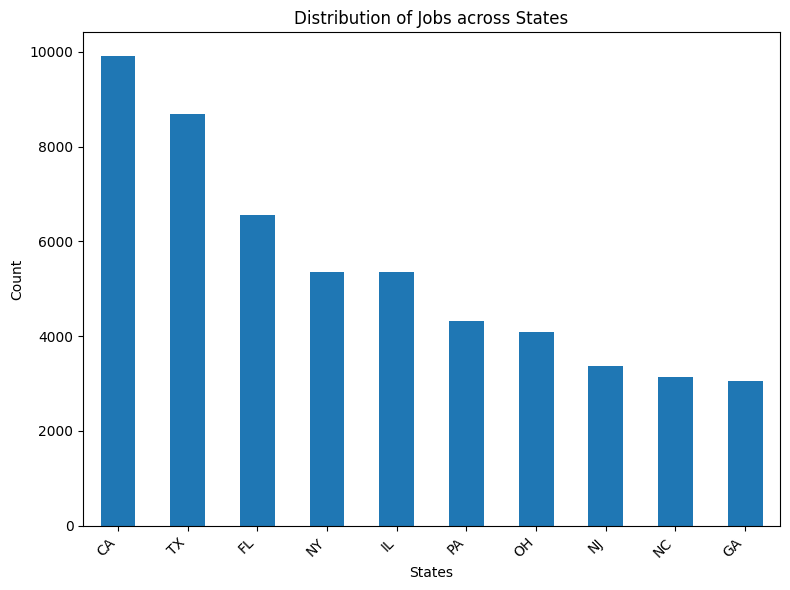

In [ ]:
# Plot a bar chart for state distribution
plt.figure(figsize=(8, 6))
jobs_df['State'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Jobs across States')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# # Convert 'StartDate' column to datetime format
# jobs_df['Title'] = jobs_df['Title'].str.lower().str.replace('[^\w\s]', '')

# def get_similarity(title1, title2):
#     return fuzz.ratio(title1, title2)

# # Calculate similarity between titles
# jobs_df['Similarity'] = jobs_df['Title'].apply(lambda x: get_similarity(x, 'desired_title'))



**Handling missing values**

I'll use the "state_to_zipcode" list generated using the users dataset to replace the missing zipcodes in the jobs dataset

In [ ]:
# Replace NaN values in 'Zipcode' column using the mapping
jobs_df['Zip5'] = jobs_df.apply(lambda row: state_to_zipcode.get(row['State'], row['Zip5']), axis=1)

# Print the updated DataFrame
jobs_df.head()

,JobID,WindowID,Title,City,State,Country,Zip5,StartDate,EndDate,DescCleaned,ReqCleaned
0,1,1,Security Engineer/Technical Lead,Washington,DC,US,20029,2012-03-07 13:17:01.643,2012-04-06 23:59:59,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,1,SAP Business Analyst / WM,Charlotte,NC,US,28027,2012-03-21 02:03:44.137,2012-04-20 23:59:59,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,1,P/T HUMAN RESOURCES ASSISTANT,Winter Park,FL,US,32750,2012-03-02 16:36:55.447,2012-04-01 23:59:59,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,1,Route Delivery Drivers,Orlando,FL,US,32750,2012-03-03 09:01:10.077,2012-04-02 23:59:59,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,1,Housekeeping,Orlando,FL,US,32750,2012-03-03 09:01:11.88,2012-04-02 23:59:59,i make sure every part of their day is magical...,please refer to the job description to view th...


In [ ]:
jobs_df.isnull().sum()
# missing_job_percentage = (jobs_df.isnull().sum() / len(jobs_df)) * 100
# missing_job_percentage

JobID             0
WindowID          0
Title             0
City              0
State             0
Country           0
Zip5              0
StartDate         0
EndDate           0
DescCleaned       0
ReqCleaned     7911
dtype: int64

Now that we're done with the zipcodes, we'll handle the missing requirements values. I'll try to apply the same technique used to handle zipcode values.

In [ ]:
# Create a dictionary mapping title values to requirements values
title_to_req = jobs_df.dropna(subset=['Title', 'ReqCleaned'])[['Title', 'ReqCleaned']].set_index('Title')['ReqCleaned'].to_dict()

In [ ]:
# Replace NaN values in 'ReqCleaned' column using the mapping
jobs_df['ReqCleaned'] = jobs_df.apply(lambda row: title_to_req.get(row['Title'], row['ReqCleaned']) if pd.isna(row['ReqCleaned']) else row['ReqCleaned'], axis=1)
# USA_jobs['ReqCleaned'] = USA_jobs.apply(lambda row: title_to_req.get(row['Title'], row['ReqCleaned']), axis=1)

# Print the updated DataFrame
missing_job_percentage = (jobs_df.isnull().sum() / len(jobs_df)) * 100
missing_job_percentage

JobID          0.000000
WindowID       0.000000
Title          0.000000
City           0.000000
State          0.000000
Country        0.000000
Zip5           0.000000
StartDate      0.000000
EndDate        0.000000
DescCleaned    0.000000
ReqCleaned     4.814188
dtype: float64

In [ ]:
titles_with_descr=[]
# Print the first 5 elements using islice
for key, value in title_to_req.items():
    titles_with_descr.append(key)

In [ ]:
len(titles_with_descr)

52066

In [ ]:
len(jobs_df['Title'].unique())

56468

In [ ]:
num_titles_without_descr= len(jobs_df['Title'].unique())- len(titles_with_descr)
num_titles_without_descr

4402

In [ ]:
jobs_df.dropna(subset=['ReqCleaned'], inplace=True)

In [ ]:
jobs_df.shape

(95103, 11)

In [ ]:
# Print the updated DataFrame
missing_job_percentage = (jobs_df.isnull().sum() / len(jobs_df)) * 100
missing_job_percentage

JobID          0.0
WindowID       0.0
Title          0.0
City           0.0
State          0.0
Country        0.0
Zip5           0.0
StartDate      0.0
EndDate        0.0
DescCleaned    0.0
ReqCleaned     0.0
dtype: float64

In [ ]:
jobs_df['Title'].value_counts()

Own Your Own Franchise!                                       938
Retail Wireless Sales Consultant                              472
Retail Sales Associate                                        429
Trainee Hourly                                                425
Sales Representative / Account Manager /  Customer Service    385
                                                             ... 
Maintenance Analyst                                             1
Senior Gas Trader                                               1
Retail Customer Service--Face to face retail sales              1
Consulting Database Administrator                               1
McKesson Paragon Financial Applications Analyst                 1
Name: Title, Length: 52066, dtype: int64

In [ ]:
jobs_df.head()

,JobID,WindowID,Title,City,State,Country,Zip5,StartDate,EndDate,DescCleaned,ReqCleaned
0,1,1,Security Engineer/Technical Lead,Washington,DC,US,20029,2012-03-07 13:17:01.643,2012-04-06 23:59:59,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,1,SAP Business Analyst / WM,Charlotte,NC,US,28027,2012-03-21 02:03:44.137,2012-04-20 23:59:59,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,1,P/T HUMAN RESOURCES ASSISTANT,Winter Park,FL,US,32750,2012-03-02 16:36:55.447,2012-04-01 23:59:59,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,1,Route Delivery Drivers,Orlando,FL,US,32750,2012-03-03 09:01:10.077,2012-04-02 23:59:59,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,1,Housekeeping,Orlando,FL,US,32750,2012-03-03 09:01:11.88,2012-04-02 23:59:59,i make sure every part of their day is magical...,please refer to the job description to view th...


## Feature engineering

In [ ]:
jobs_df.shape

(95103, 11)

In [ ]:
jobs_df.columns

Index(['JobID', 'WindowID', 'Title', 'City', 'State', 'Country', 'Zip5',
       'StartDate', 'EndDate', 'DescCleaned', 'ReqCleaned'],
      dtype='object')

The 'WindowID' column holds limited significance within the context of the recommendation system. Similarly, paralleling our approach with the users dataset, we will omit the 'City', 'State', and 'Country' columns, which essentially indicate locations. Instead, we will retain the 'Zip5' column for location information.

Additionally, there's a question of whether the date columns bear substantial relevance in our present context. As of now, their contribution seems less pronounced. Consequently, I propose temporarily excluding them from our dataset.

This decision culminates in the retention of only the following columns: 'JobID', 'Title', 'Zip5', 'DescCleaned', and 'ReqCleaned', which will serve as the core features for our job dataset.

In [ ]:
useful_jobs_df= jobs_df[[ 'JobID', 'Title', 'Zip5', 'DescCleaned','ReqCleaned']]
useful_jobs_df.head()

,JobID,Title,Zip5,DescCleaned,ReqCleaned
0,1,Security Engineer/Technical Lead,20029,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,SAP Business Analyst / WM,28027,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,P/T HUMAN RESOURCES ASSISTANT,32750,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,Route Delivery Drivers,32750,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,Housekeeping,32750,i make sure every part of their day is magical...,please refer to the job description to view th...


**Remove duplicates**

In [ ]:
sorted_jobs_df=useful_jobs_df.sort_values(by='JobID')
sorted_jobs_df.head()

,JobID,Title,Zip5,DescCleaned,ReqCleaned
0,1,Security Engineer/Technical Lead,20029,security clearance required top secret job num...,skill set network security tools webdefend web...
1,4,SAP Business Analyst / WM,28027,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...
2,7,P/T HUMAN RESOURCES ASSISTANT,32750,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...
3,8,Route Delivery Drivers,32750,city beverages come to work for the best in th...,please refer to the job description to view th...
4,9,Housekeeping,32750,i make sure every part of their day is magical...,please refer to the job description to view th...


In [ ]:
sorted_jobs_df.to_csv('jobs_final_df')

In [ ]:
sorted_jobs_df.shape

(95103, 5)

In [ ]:
duplicate_jobs = sorted_jobs_df[sorted_jobs_df.duplicated()] #get all duplicates
jobs_df_cleaned = sorted_jobs_df.drop_duplicates() #remove duplicates from the dataset
jobs_df_cleaned.shape

(95103, 5)

It appears as there are also no duplicates in this dataset

**Encode categorical data**

As we have text data in columns 'DescCleaned' and 'ReqCleaned', I will use text preprocessing techniques to convert the textual content into numerical features that models can understand. One common approach is using methods like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings.

TF-IDF Vectorization:
TF-IDF represents the importance of each word in a document relative to a collection of documents. It converts text into a numerical matrix where each row represents a document and each column represents a unique word.

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TF-IDF vectorizer instance
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the 'Requirements' column
# requirements_tfidf = tfidf_vectorizer.fit_transform(jobs_df_cleaned['ReqCleaned'])
# requirements_tfidf_df = pd.DataFrame(requirements_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Fit and transform the 'Description' column
# description_tfidf = tfidf_vectorizer.fit_transform(jobs_df_cleaned['DescCleaned'])
# description_tfidf_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Add the TF-IDF encoded features back to the DataFrame
# final_jobs_df = pd.concat([jobs_df_cleaned, requirements_tfidf_df, description_tfidf_df], axis=1)

In [ ]:
!python -m spacy download en_core_web_md

2023-08-30 18:47:39.096827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 18:47:42.332941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")  # Load the pre-trained word vectors

In [ ]:
# # Tokenize and vectorize the 'Requirements' column
# requirements_embeddings = jobs_df_cleaned['ReqCleaned'].apply(lambda x: nlp(x).vector)
# requirements_embeddings_df = pd.DataFrame(list(requirements_embeddings))

# # Tokenize and vectorize the 'Description' column
# description_embeddings = jobs_df_cleaned['DescCleaned'].apply(lambda x: nlp(x).vector)
# description_embeddings_df = pd.DataFrame(list(description_embeddings))

# # Add the word embeddings encoded features back to the DataFrame
# df = pd.concat([jobs_df_cleaned, requirements_embeddings_df, description_embeddings_df], axis=1)


In [ ]:
# # Save the DataFrame to a CSV file
# csv_filename = 'preprocessed_jobs_df.csv'  # Specify the desired file name
# df.to_csv(csv_filename, index=False)  # Set index=False to exclude index column

In [ ]:
# df.head()

In [ ]:
# df['Zipcodes_encoded'] = label_encoder.fit_transform(df['Zip5'])
# df.head()

In [ ]:
# df['Titles_encoded'] = label_encoder.fit_transform(df['Title'])
# df.head()

In [ ]:
# # Drop columns 'Title', 'Zip5', 'DescCleaned', 'ReqCleaned'
# columns_to_drop = ['Title', 'Zip5', 'DescCleaned', 'ReqCleaned']
# jobs_df_final = df.drop(columns=columns_to_drop)
# jobs_df_final.head()

**Standardisation**

In [ ]:
# standardized_jobs_data=standardise(jobs_df_final)
# standardized_jobs_data.head()

In [ ]:
# # Save the DataFrame to a CSV file
# csv_filename = 'standardized_jobs_data.csv'  # Specify the desired file name
# standardized_jobs_data.to_csv(csv_filename, index=False)  # Set index=False to exclude index column
# standardized_jobs_data=pd.read_csv('/content/standadised_jobs_df.csv')

# Users history

In [ ]:
user_history

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant
...,...,...,...,...,...
1753896,1472060,7,Train,2,Sales Associate
1753897,1472060,7,Train,3,Sales Associate
1753898,1472089,7,Train,1,Founder and President-Children's Entertainment...
1753899,1472089,7,Train,2,Specification Sales


In [ ]:
user_history.shape

(1753901, 5)

In [ ]:
user_history.columns

Index(['UserID', 'WindowID', 'Split', 'Sequence', 'JobTitle'], dtype='object')

In [ ]:
((user_history.isnull().sum())/ len(user_history))*100

UserID      0.000000
WindowID    0.000000
Split       0.000000
Sequence    0.000000
JobTitle    5.737781
dtype: float64

Groupe the dataset by users Id to get the job titles histories of each user

In [ ]:
# # Group by 'userId' and aggregate the 'job_title' column
# grouped = user_history.groupby('UserID')['JobTitle'].unique().reset_index()

# # Create a new DataFrame for printing
# users_pref_df = pd.DataFrame(grouped, columns=['UserID', 'JobTitle'])
# users_pref_df

In [ ]:
# users_df.shape

Get only columns 'UserID' and 'JobTitle'

In [ ]:
# id_jobt_df=user_history[['UserID', 'JobTitle']] #take only user ID and job title

# # Rename 'JobTitle' to 'Title'
# id_jobt_df.rename(columns={'JobTitle': 'Title'}, inplace=True)

# jobid_title=USA_jobs[['Title','JobID']] #Get job ID

# id_jobs_df=pd.merge(id_jobt_df,jobid_title) #merge job ids to id_jobt_df
# id_jobs_df.head()

In [ ]:
# id_jobs_df.sort_values(by='UserID')

Map job title to job IDS

In [ ]:
# # Convert the dictionary to a list of tuples
# data_list = list(jobsid_to_title.items())

# # Create a DataFrame from the list
# jobsid_to_title_df = pd.DataFrame(data_list, columns=['JobID', 'Title'])
# jobsid_to_title_df.head()

# Windows

In [ ]:
window_dates

,Window,Train Start,Train End / Test Start,Test End
0,1,2012-04-01 00:00:00,2012-04-10 00:00:00,2012-04-14 00:00:00
1,2,2012-04-14 00:00:00,2012-04-23 00:00:00,2012-04-27 00:00:00
2,3,2012-04-27 00:00:00,2012-05-06 00:00:00,2012-05-10 00:00:00
3,4,2012-05-10 00:00:00,2012-05-19 00:00:00,2012-05-23 00:00:00
4,5,2012-05-23 00:00:00,2012-06-01 00:00:00,2012-06-05 00:00:00
5,6,2012-06-05 00:00:00,2012-06-14 00:00:00,2012-06-18 00:00:00
6,7,2012-06-18 00:00:00,2012-06-27 00:00:00,2012-07-01 00:00:00


In [ ]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(5 * figscale, 5 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(window_dates, *['Train End / Test Start', 'Test End'], **{})
chart

In [ ]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(5 * figscale, 5 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(window_dates, *['Train Start', 'Train End / Test Start'], **{})
chart

# *Applications*

In [ ]:
apps

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748
...,...,...,...,...,...
1603106,1472089,7,Train,2012-06-23 16:06:03.087,573732
1603107,1472089,7,Train,2012-06-25 23:20:35.603,39401
1603108,1472089,7,Train,2012-04-30 14:01:42.52,175198
1603109,1472089,7,Train,2012-04-30 13:52:45.823,1073263


In [ ]:
apps.columns

Index(['UserID', 'WindowID', 'Split', 'ApplicationDate', 'JobID'], dtype='object')

In [ ]:
apps.sort_values(by='UserID')

,UserID,WindowID,Split,ApplicationDate,JobID
563238,7,3,Train,2012-04-22 08:14:26.443,309823
563239,7,3,Train,2012-04-28 12:17:58.63,703889
780806,9,4,Train,2012-05-14 22:30:42.09,809208
780808,9,4,Train,2012-05-14 22:48:09.997,617374
780807,9,4,Train,2012-05-14 22:38:37.243,136489
...,...,...,...,...,...
1603108,1472089,7,Train,2012-04-30 14:01:42.52,175198
1603110,1472089,7,Train,2012-04-30 13:39:15.213,646949
1014698,1472090,4,Train,2012-05-12 16:40:51.22,254881
1014697,1472090,4,Train,2012-05-12 16:40:50.483,209535


# Keras

In [ ]:
import csv
import random
from tqdm.notebook import tqdm

In [ ]:
new_jobs_df=pd.read_csv('/content/jobs_final_df')
new_users_df=pd.read_csv('/content/users_final_df')

In this step, I'll get a list of the jobs to which each user applied and store them in lists

In [ ]:
user_list = []
job_list = []
applied_list = []
with open("/content/drive/MyDrive/job_recsys/apps.tsv", "r") as infile:
    reader = csv.reader(
        infile,
        delimiter="\t",
        quoting=csv.QUOTE_NONE,
        quotechar="",
    )

    # skip header
    next(reader)

    for line in reader:
        (UserId, WindowID, Split, ApplicationDate, JobId) = line
        user_id = int(UserId)
        job_id = int(JobId)
        applied_list.append([user_id, job_id, 1])
        user_list.append(user_id)
        job_list.append(job_id)

# Remove duplicates
user_list = list(set(user_list))
job_list = list(set(job_list))

In [ ]:
len(user_list)

321235

In [ ]:
len(job_list)

365668

In [ ]:
len(applied_list)

1603111

Then get a list of jobs to which the users didn't apply. The purpose is to store combinations of user IDs, job IDs, and a value of 0, indicating that the user has not applied to the respective job. Overall, this in this section, we  generate a list of combinations between users and jobs, indicating that the users have not applied to those jobs, and prepares this data for further use.


In [ ]:
not_applied_list = []
for user_id in tqdm(user_list):
    random_job_list = random.choices(job_list, k=5)
    for job_id in random_job_list:
        not_applied_list.append([user_id, job_id, 0])

  0%|          | 0/321235 [00:00<?, ?it/s]

In [ ]:
len(not_applied_list)

1606175

Shuffle the elements within the lists in a random order.

In [ ]:
random.shuffle(applied_list)
random.shuffle(not_applied_list)

Split datset into train and validation sets

In [ ]:
train_ratio = 0.6
applied_train_length = int(len(applied_list) * train_ratio)
not_applied_train_length = int(len(not_applied_list) * train_ratio)
train_list = applied_list[:applied_train_length] + not_applied_list[:applied_train_length]
valid_list = applied_list[applied_train_length:] + not_applied_list[not_applied_train_length:]

random.shuffle(train_list)


In [ ]:
print(f'Train length: {len(train_list)}')
print(f'Valid length: {len(valid_list)}')

Train length: 1923732
Valid length: 1283715


In [ ]:
train_list[:10]

[[564912, 485597, 0],
 [1088054, 653616, 0],
 [1097086, 533422, 0],
 [1124409, 757994, 0],
 [144004, 883113, 0],
 [654146, 666699, 1],
 [645325, 1069274, 1],
 [452318, 401840, 0],
 [561766, 57942, 1],
 [725093, 155227, 0]]

**Custom Dataloader**

In a machine learning context, data loaders are crucial for efficiently feeding data into training loops. They help manage memory usage and optimize the training process by processing data in batches rather than individual samples.

In [ ]:
import math
from tensorflow.keras.utils import Sequence

In [ ]:
class CustomDataloader(Sequence):
    def __init__(
        self,
        input_list: list = None,
        batch_size: int = 10,
    ):
        self.input_list = input_list
        self.batch_size = batch_size

    def __len__(self):
        return len(self.input_list) // self.batch_size

    def __getitem__(self, index):
        start_index = self.batch_size * index
        batch_list = self.input_list[start_index : start_index + self.batch_size]

        input_list = []
        target_list = []
        for user_id, job_id, is_applied in batch_list:
            input = [user_id, job_id]
            target = is_applied

            input_list.append(input)
            target_list.append(target)

        return np.array(input_list), np.array(target_list)

**Model Creation**

The model will be created using keras from tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Below, the architecture of a recommendation system model using Keras is outlined. This model, named RecSysNet, is designed for generating recommendations for job-user pairs.

In [ ]:
class RecSysNet(keras.Model):
    def __init__(self, num_users, num_jobs, h_dim):
        super().__init__()
        self.num_users = num_users
        self.num_jobs = num_jobs
        self.h_dim = h_dim

        self.user_embedding = layers.Embedding(num_users, h_dim) #create an embedding layer for user IDs
        self.job_embedding = layers.Embedding(num_jobs, h_dim) #create an embedding layer for job IDs.

        #Fully connected layers with ReLU activation functions
        self.dense_1 = layers.Dense(h_dim, activation=tf.nn.relu)
        self.dense_2 = layers.Dense(h_dim, activation=tf.nn.relu)
        self.dense_3 = layers.Dense(32, activation=tf.nn.relu)
        self.dense_4 = layers.Dense(1)
        self.sigmoid = tf.nn.sigmoid

    # This method defines the forward pass of the model
    def call(self, inputs):
        user_ids = inputs[:, 0] #Extract user IDs from the input tensor.
        job_ids = inputs[:, 1]  #Extracts jobs IDs from the input tensor.
        user_vector = self.user_embedding(user_ids) #Embed user IDs using the user embedding layer
        job_vector = self.job_embedding(job_ids)    #Embed jobs IDs using the user embedding layer

        # Now, we concatenate user and job vectors.
        x = tf.concat(
            values=[user_vector, job_vector],
            axis=1,
                    )

        #Apply the defined dense layers sequentially to the concatenated vector
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)

        return self.sigmoid(x) #Return the sigmoid activation of the final output, representing the recommendation score.

To resume, this model takes users and jobs IDs as input, embeds them, concatenates the embeddings, and passes them through a series of fully connected layers to generate a recommendation score using a sigmoid activation function. This architecture will be used to predict the likelihood of a user applying for a given job.

Now, let's delve into the creation of two data loaders: `train_loader` and `valid_loader`. These loaders are implemented using the custom `CustomDataloader` class that was previously designed to handle training and validation data in the context of machine learning. To ensure efficiency during the training process, I've opted for a batch size of 2. For the validation step, I've chosen a batch size of 4.

In [ ]:
#train
train_loader = CustomDataloader(
    input_list=train_list,
    batch_size=1,
)
valid_loader = CustomDataloader(
    input_list=valid_list,
    batch_size=2,
)

In this section, I create an instance of the `RecSysNet` class, utilizing the calculated number of users, the number of jobs, and specifying a hidden dimension `h_dim` of 256. This instantiation results in the formation of a recommender model tailored to predicting user preferences for job recommendations.

For the selected loss function, I opt for **binary cross-entropy**, a widely used metric for tasks involving binary classification, such as ours. It's essential to recall that our aim is to predict the likelihood of a user applying to a particular job, indicating a binary classification scenario where a user either applies or doesn't.

Regarding optimization, the optimizer as **Adam** was configured, leveraging a learning rate of **1e-4**. Adam is a renowned optimization algorithm renowned for its ability to dynamically adjust the learning rate throughout the training process.

All of these chosen parameters and hyperparameters are designed to facilitate the model's learning process from the available data. The ultimate goal is to enable the model to make predictions that effectively minimize the selected loss function, thereby enhancing the quality of recommendations provided.

Limit the amount of GPU memory that TensorFlow uses by configuring GPU memory growth. Before creating the model, the GPU memory growth is set to avoid allocating all available memory upfront

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
num_users = len(user_list)
num_jobs = len(job_list)
num_train=len(train_list)
model = RecSysNet(num_train, num_train, h_dim=256)

model.compile(
  loss=keras.losses.BinaryCrossentropy(),
  optimizer=keras.optimizers.Adam(learning_rate=1e-4),
)

The number of epochs is set to 50, meaning the model will undergo 50 complete passes through the training data.

In [ ]:
model.fit(
    train_loader,
    validation_data=valid_loader,
    epochs=10,
    steps_per_epoch=100, validation_steps=10
)

Epoch 1/10
100/100 [==============================] - 819s 8s/step - loss: 0.6958 - val_loss: 0.6831
Epoch 2/10
100/100 [==============================] - 625s 6s/step - loss: 0.6928 - val_loss: 0.6840
Epoch 3/10
100/100 [==============================] - 664s 7s/step - loss: 0.6930 - val_loss: 0.6649
Epoch 4/10
100/100 [==============================] - 675s 7s/step - loss: 0.6942 - val_loss: 0.6729
Epoch 5/10
100/100 [==============================] - 675s 7s/step - loss: 0.6923 - val_loss: 0.6698
Epoch 6/10
100/100 [==============================] - 628s 6s/step - loss: 0.6938 - val_loss: 0.6704
Epoch 7/10
100/100 [==============================] - 617s 6s/step - loss: 0.6929 - val_loss: 0.6728
Epoch 8/10
100/100 [==============================] - 624s 6s/step - loss: 0.6946 - val_loss: 0.6908
Epoch 9/10
100/100 [==============================] - 645s 6s/step - loss: 0.6925 - val_loss: 0.6850
Epoch 10/10
100/100 [==============================] - 648s 6s/step - loss: 0.6944 - val_lo

In [ ]:
model.summary()

Model: "rec_sys_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  492475392 
                                                                 
 embedding_1 (Embedding)     multiple                  492475392 
                                                                 
 dense (Dense)               multiple                  131328    
                                                                 
 dense_1 (Dense)             multiple                  65792     
                                                                 
 dense_2 (Dense)             multiple                  8224      
                                                                 
 dense_3 (Dense)             multiple                  33        
                                                                 
Total params: 985,156,161
Trainable params: 985,156,161

In [ ]:
# Save the model as a SavedModel
tf.saved_model.save(model, 'recsys_model')

In [ ]:
model.evaluate(valid_loader)

641857/641857 [==============================] - 716s 1ms/step - loss: 0.6921


0.6921334266662598

In [ ]:
!saved_model_cli show --dir /content/drive/MyDrive/job_recsys/recsys_model --tag_set serve --signature_def serving_default


2023-08-30 11:09:30.472517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_INT64
      shape: (-1, 2)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
# import tensorflow as tf
# import zipfile

# # Specify the path to your ZIP file
# zip_path = '/content/drive/MyDrive/job_recsys/recsys_model.zip'

# # Specify the directory where you want to extract the contents
# extract_path = '/content/drive/MyDrive/job_recsys/recsys_model/'

# # Unzip the file

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# Load the saved model tf.keras.models.load_model

loaded_model = tf.saved_model.load('/content/drive/MyDrive/job_recsys/recsys_model/recsys_model')

In [ ]:
# Define the signature name (check your model's signature name)
signature_name = 'serving_default'

# Get the model's signature
infer= loaded_model.signatures[signature_name]

In [ ]:
def get_rec_jobs_keras(user_id):
  #create user to job matrix match
  user_list=[(user_id,job_id) for job_id in job_list]

  # Convert input data to a TensorFlow tensor
  input_data_tensor = tf.convert_to_tensor(user_list, dtype=tf.int64)

  # Make predictions using the loaded model's signature
  predictions = infer(input_1=input_data_tensor)  # Use the correct input name
  predicted_probs_array = predictions['output_1'].numpy()
  predicted_probs=predicted_probs_array.tolist() #convert preds to list

  #rank the results
  result = []
  for (user_id, job_id), [prob] in zip(user_list, predicted_probs):
      result.append((user_id, job_id, prob))

  sorted_results = sorted(result, key=lambda x: x[2], reverse=True)
  rec_job_ids=[i[1] for i in sorted_results[:10]] #get job ids

  # Filter the DataFrame based on the job IDs list
  filtered_jobs = new_jobs_df[new_jobs_df['JobID'].isin(rec_job_ids)]
  filtered_jobs=filtered_jobs[['JobID','Title','ReqCleaned','DescCleaned']]

  return filtered_jobs


In [ ]:
get_rec_jobs_keras(7)

,JobID,Title,ReqCleaned,DescCleaned
7824,29380,ACCOUNTING CLERK Now Hiring Full Time or Par...,please refer to the job description to view th...,accounting clerk now hiring full time or part ...
90202,373045,Bilingual CSR,"high school diploma, ged, or equivalent certif...",hawkins personnel group is looking for talente...


# Using Embeddings and Cosine Similarity Scores

In [ ]:
new_jobs_df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
JobID,1,4,7,8,9
Title,Security Engineer/Technical Lead,SAP Business Analyst / WM,P/T HUMAN RESOURCES ASSISTANT,Route Delivery Drivers,Housekeeping
Zip5,20029,28027,32750,32750,32750
DescCleaned,security clearance required top secret job num...,no corp. to corp resumes are being considered ...,p/t human resources assistant —— 1-2 years ex...,city beverages come to work for the best in th...,i make sure every part of their day is magical...
ReqCleaned,skill set network security tools webdefend web...,what you need four year college degree minimum...,please refer to the job description to view th...,please refer to the job description to view th...,please refer to the job description to view th...


In [ ]:
new_jobs_df['texts'] = new_jobs_df['Title'] + new_jobs_df['DescCleaned'] + new_jobs_df['ReqCleaned'] #merge all text or categorical data
new_jobs_df.head()

,Unnamed: 0,JobID,Title,Zip5,DescCleaned,ReqCleaned,texts
0,0,1,Security Engineer/Technical Lead,20029,security clearance required top secret job num...,skill set network security tools webdefend web...,Security Engineer/Technical Leadsecurity clear...
1,1,4,SAP Business Analyst / WM,28027,no corp. to corp resumes are being considered ...,what you need four year college degree minimum...,SAP Business Analyst / WMno corp. to corp resu...
2,2,7,P/T HUMAN RESOURCES ASSISTANT,32750,p/t human resources assistant —— 1-2 years ex...,please refer to the job description to view th...,P/T HUMAN RESOURCES ASSISTANT p/t human resour...
3,3,8,Route Delivery Drivers,32750,city beverages come to work for the best in th...,please refer to the job description to view th...,Route Delivery Driverscity beverages come to w...
4,4,9,Housekeeping,32750,i make sure every part of their day is magical...,please refer to the job description to view th...,Housekeepingi make sure every part of their da...


In [ ]:
new_jobs_df = new_jobs_df.dropna()
new_jobs_df.isnull().sum()

Unnamed: 0     0
JobID          0
Title          0
Zip5           0
DescCleaned    0
ReqCleaned     0
texts          0
dtype: int64

In [ ]:
#data splitting
train_ratio = 0.3
train_length = int(len(new_jobs_df) * train_ratio)
train_list = new_jobs_df[:train_length]

In [ ]:
train_list.shape

(28418, 7)

In [ ]:
#Vectorise or encode the text
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(train_list['texts'])

In [ ]:
tfidf_matrix.shape

(37891, 1633491)

In [ ]:
jobs_cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) #calcilate the cosine similarity between each element

In [ ]:
# #save jobs cosine similarities
# import joblib

# # Save cosine_sim using joblib
# joblib.dump(cosine_sim, 'jobs_cosine_sim.joblib')

['jobs_cosine_sim.joblib']

In [ ]:
# cosine_sim = joblib.load('jobs_cosine_sim.joblib')

In [ ]:
jobs_US_base_line = train_list.reset_index()
titles = jobs_US_base_line['Title']
indices = pd.Series(jobs_US_base_line.index, index=jobs_US_base_line['Title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(jobs_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]

    # Get the original indices from the train_list DataFrame
    original_indices = jobs_US_base_line.iloc[job_indices]['index'][:10]

    # Use the original indices to access the recommended jobs from jobs_US_base_line
    recommended_jobs = jobs_US_base_line.loc[original_indices][['JobID','Title','DescCleaned','ReqCleaned','Zip5']]

    return recommended_jobs


In [ ]:
get_recommendations('Route Delivery Drivers')

,JobID,Title,DescCleaned,ReqCleaned,Zip5
3,8,Route Delivery Drivers,city beverages come to work for the best in th...,please refer to the job description to view th...,32750
48,54,TRACTOR TRAILER DRIVER,tractor trailer driver —— apopka. drive all o...,please refer to the job description to view th...,32750
43,48,ON-SITE SALES,on-site sales - new homes the time is back! g...,please refer to the job description to view th...,32750
26,31,EXPERIENCED ROOFERS,experienced roofers —— needed immediately mon...,please refer to the job description to view th...,32750
31,36,DRIVERS,drivers —— mctyre trucking. m ust have oversi...,please refer to the job description to view th...,32750
3933,16047,Electricians,electricians electricians commercial all level...,we participate in everify.,85037
44,49,SALES REPRESENTATIVE,sales representative —— aggressive sales repr...,please refer to the job description to view th...,32750
6,11,SUPERINTENDENT,superintendent —— central florida general con...,please refer to the job description to view th...,32750
63,88,RN AND PHYSICIAN HOSPITALIS,florida cancer specialists seeks research coo...,please refer to the job description to view th...,32750
60,82,Associate Attorney,associate attorney - sm ins def firm seeking e...,please refer to the job description to view th...,32750


Using similarities betwwen users (Sort of collaborative filtering).

Looking at which jobs they have applied for and suggest those job to the other users who shared similar user profile.
We are finding put similar user profile based on their degree type, majors and total years of experience, managed others or not.

We will get top 5 similar users.
We will find our which are the jobs for which these users have applied
Take a union of these jobs and recommend the jobs all these user base

In [ ]:
new_users_df.head()

,Unnamed: 0,UserID,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
0,135288,7,24018,High School,Not Applicable,2,13.0,No,0
1,191184,9,79412,High School,Not Applicable,3,3.0,No,0
2,296639,13,18078,Bachelor's,Psychological & Social Sciences,6,5.0,No,0
3,191185,14,79412,None,General,2,10.0,No,0
4,244633,16,30045,Bachelor's,Security,9,9.0,No,0


In [ ]:
#data splitting
train_ratio = 0.1
user_train_length = int(len(new_users_df) * train_ratio)
user_train_df = new_users_df[:user_train_length]

In [ ]:
user_train_df.shape

(34985, 9)

In [ ]:
user_train_df.head()

,Unnamed: 0,UserID,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany
0,135288,7,24018,High School,Not Applicable,2,13.0,No,0
1,191184,9,79412,High School,Not Applicable,3,3.0,No,0
2,296639,13,18078,Bachelor's,Psychological & Social Sciences,6,5.0,No,0
3,191185,14,79412,None,General,2,10.0,No,0
4,244633,16,30045,Bachelor's,Security,9,9.0,No,0


In [ ]:
user_train_df['texts'] = user_train_df['DegreeType'] + user_train_df['Major'] + user_train_df['TotalYearsExperience'].astype(str)+ user_train_df['ManagedOthers']

<ipython-input-25-daa7e4a46630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_train_df['texts'] = user_train_df['DegreeType'] + user_train_df['Major'] + user_train_df['TotalYearsExperience'].astype(str)+ user_train_df['ManagedOthers']


In [ ]:
user_train_df.head()

,Unnamed: 0,UserID,ZipCode,DegreeType,Major,WorkHistoryCount,TotalYearsExperience,ManagedOthers,ManagedHowMany,texts
0,135288,7,24018,High School,Not Applicable,2,13.0,No,0,High SchoolNot Applicable13.0No
1,191184,9,79412,High School,Not Applicable,3,3.0,No,0,High SchoolNot Applicable3.0No
2,296639,13,18078,Bachelor's,Psychological & Social Sciences,6,5.0,No,0,Bachelor'sPsychological & Social Sciences5.0No
3,191185,14,79412,None,General,2,10.0,No,0,NoneGeneral10.0No
4,244633,16,30045,Bachelor's,Security,9,9.0,No,0,Bachelor'sSecurity9.0No


In [ ]:
tf_users = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf_users.fit_transform(user_train_df['texts'])

In [ ]:
tfidf_matrix.shape

(34985, 42094)

In [ ]:
#now creating an object of count vectorizer
cv = CountVectorizer()

#using fit_transform to make the words into sparse array
X = cv.fit_transform(user_train_df['texts']).toarray()

In [ ]:
X.shape

(43731, 12626)

In [ ]:
users_cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
user_based_approach = user_train_df.reset_index()
userid = user_based_approach['UserID']
indices = pd.Series(user_based_approach.index, index=user_based_approach['UserID'])

In [ ]:
#recommend based on similar users
def get_recommendations_userwise(userid):
    idx = indices[userid]

    sim_scores = list(enumerate(users_cosine_sim[idx]))#get similarity matrix

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #rank in decreasin order of similarity
    user_indices = [i[0] for i in sim_scores] #get ids

    return user_indices[0:20]

In [ ]:
#get the jobs IDs applied by the similar user
def get_job_id(usrid_list):
    jobs_userwise = apps['UserID'].isin(usrid_list) #
    df1 = pd.DataFrame(data = apps[jobs_userwise], columns=['JobID'])
    joblist = df1['JobID'].tolist()
    Job_list = new_jobs_df['JobID'].isin(joblist)
    df_temp = pd.DataFrame(data = new_jobs_df[Job_list], columns=['JobID','Title','DescCleaned','ReqCleaned','City','State','StartDate'])
    return df_temp

# **Web App Using STreamlit**

In [ ]:
!pip install -q streamlit

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.526s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import joblib
from matplotlib import colors


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



from scipy import stats
import seaborn as sns
import geopandas as gpd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

import datetime
# import cudf
from os.path import exists
import cv2
import gc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv


#load datasets

apps = pd.read_csv('/content/drive/MyDrive/job_recsys/apps.tsv', delimiter='\t')
new_jobs_df=pd.read_csv('/content/jobs_final_df')
new_users_df=pd.read_csv('/content/users_final_df')

user_list = []
job_list = []
applied_list = []
with open("/content/drive/MyDrive/job_recsys/apps.tsv", "r") as infile:
    reader = csv.reader(
        infile,
        delimiter="\t",
        quoting=csv.QUOTE_NONE,
        quotechar="",
    )

    # skip header
    next(reader)

    for line in reader:
        (UserId, WindowID, Split, ApplicationDate, JobId) = line
        user_id = int(UserId)
        job_id = int(JobId)
        applied_list.append([user_id, job_id, 1])
        user_list.append(user_id)
        job_list.append(job_id)

# Remove duplicates
user_list = list(set(user_list))
job_list = list(set(job_list))

#load keras model
loaded_model = tf.saved_model.load('/content/drive/MyDrive/job_recsys/recsys_model/recsys_model')

# Define the signature name
signature_name = 'serving_default'

# Get the model's signature
infer= loaded_model.signatures[signature_name]

#define keras function
def get_rec_jobs_keras(user_id):
  #create user to job matrix match
  user_list=[(user_id,job_id) for job_id in job_list]

  # Convert input data to a TensorFlow tensor
  input_data_tensor = tf.convert_to_tensor(user_list, dtype=tf.int64)

  # Make predictions using the loaded model's signature
  predictions = infer(input_1=input_data_tensor)  # Use the correct input name
  predicted_probs_array = predictions['output_1'].numpy()
  predicted_probs=predicted_probs_array.tolist() #convert preds to list

  #rank the results
  result = []
  for (user_id, job_id), [prob] in zip(user_list, predicted_probs):
      result.append((user_id, job_id, prob))

  sorted_results = sorted(result, key=lambda x: x[2], reverse=True)
  rec_job_ids=[i[1] for i in sorted_results[:10]] #get job ids

  # Filter the DataFrame based on the job IDs list
  filtered_jobs = new_jobs_df[new_jobs_df['JobID'].isin(rec_job_ids)]
  filtered_jobs=filtered_jobs[['JobID','Title','ReqCleaned','DescCleaned']]

  return filtered_jobs

#content based
new_jobs_df['texts'] = new_jobs_df['Title'] + new_jobs_df['DescCleaned'] + new_jobs_df['ReqCleaned'] #merge all text or categorical data
new_jobs_df = new_jobs_df.dropna()

#data splitting
train_ratio = 0.3
train_length = int(len(new_jobs_df) * train_ratio)
train_list = new_jobs_df[:train_length]

#Vectorise or encode the text
tf_users = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf_users.fit_transform(train_list['texts'])

#calcilate the cosine similarity between each element
jobs_cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

jobs_US_base_line = train_list.reset_index()
titles = jobs_US_base_line['Title']
indices = pd.Series(jobs_US_base_line.index, index=jobs_US_base_line['Title'])

def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(jobs_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]

    # Get the original indices from the train_list DataFrame
    original_indices = jobs_US_base_line.iloc[job_indices]['index'][:10]

    # Use the original indices to access the recommended jobs from jobs_US_base_line
    recommended_jobs = jobs_US_base_line.loc[original_indices][['JobID','Title','DescCleaned','ReqCleaned','Zip5']]

    return recommended_jobs






st.write('Hello, and welcome to the  *Job Recommender Engine!* :sunglasses:')

st.caption('The aim of this project is to design and develop a Job Recommendation System for Enhanced Job Seeker Experience.')
st.caption('It is only based on :red[USA] data from back in :red[2012].')
st.caption('You have can make search either by job title (:blue[Content based recommendation]) or by user ID (:blue[Collaborative filtering recommendation])')
st.caption(':red[NB]: Due to limitations in storage resources and memory, only a subset of the dataset was utilized for this project.')
st.caption('    Consequently, there may be instances where certain queries lack results, as the corresponding data may not have been included in the sampled dataset used for analysis.')

st.divider()

genre = st.radio(
    "Select a recommender mode",
    [":rainbow[Collaborative filtering recommendation]",":rainbow[Content based recommendation]" ])
#try:
if genre == ':rainbow[Collaborative filtering recommendation]':
  num_input = st.number_input("Enter user ID 👇",7)
  st.dataframe(get_rec_jobs_keras(num_input))

elif genre == ':rainbow[Content based recommendation]':
    #num_input = st.number_input("Enter User ID 👇")
    text_input = st.text_input("Enter Job Title 👇",'Route Delivery Drivers')
    st.dataframe(get_recommendations(text_input))

    #if len(get_rec_jobs_keras(num_input))!=0:
    #  st.dataframe(get_rec_jobs_keras(num_input))
    # elif len(get_job_id(get_recommendations_userwise(num_input)))!=0:
    #   get_job_id(get_recommendations_userwise(num_input))
else:
    st.write("Choose a recommender mode!")
#except:
  #st.write("Unfortunately the user's data is not present in the sampled data!")


Overwriting app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.8s
your url is: https://violet-bottles-happen.loca.lt
